In [2]:
# ! pip install transformers tokenizers sentencepiece protobuf # останні два може бути потрібно для деяких токенайзерів
# !pip install pandas numpy matplotlib scikit-learn



In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline


In [4]:
news_articles_path = "BBC News Summary/News Articles/"
summaries_path = "BBC News Summary/Summaries/"

all_data = []
articles = []
summaries = []


for subdir, dirs, files in os.walk(news_articles_path):
    for file in files:
        article_path = os.path.join(subdir, file)
        summary_path = article_path.replace('News Articles', 'Summaries')

        with open(article_path,'r',errors='ignore') as f:
            article = ' '.join([i.rstrip() for i in f.readlines()])
            articles.append(article)
            f.close()

        with open(summary_path,'r',errors='ignore') as f:
            summary=''.join([i.rstrip() for i in f.readlines()])
            summaries.append(summary)
            f.close()


In [5]:
df = pd.read_csv('./data/news_summary.csv', encoding='iso-8859-1')
df.head()

# Removing NaNs if any
df.drop_duplicates(subset=["ctext"],inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

df.describe()

,author,date,headlines,read_more,text,ctext
count,4341,4341,4341,4341,4341,4341
unique,45,240,4341,4341,4341,4341
top,Chhavi Tyagi,"19 Jul 2017,Wednesday",Daman & Diu revokes mandatory Rakshabandhan in...,http://www.hindustantimes.com/india-news/raksh...,The Administration of Union Territory Daman an...,The Daman and Diu administration on Wednesday ...
freq,537,76,1,1,1,1


In [6]:
summaries = np.array(df.text)
summary_lengths = np.array([len(text) for text in summaries])

full_texts = np.array(df.ctext)
full_texts_lengths = np.array([len(text) for text in full_texts])

full_texts_lengths.mean(), summary_lengths.mean()

(2050.8461184058974, 354.8825155494126)

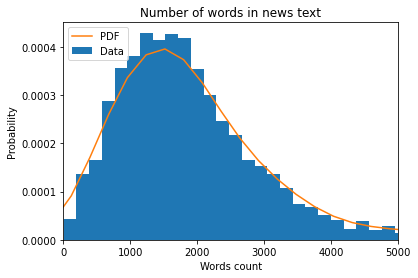

In [7]:

plt.hist(full_texts_lengths, density=True, bins=400, label="Data")
mn, mx = plt.xlim()
plt.xlim(0, 5000)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(full_texts_lengths)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Words count")
plt.title("Number of words in news text");

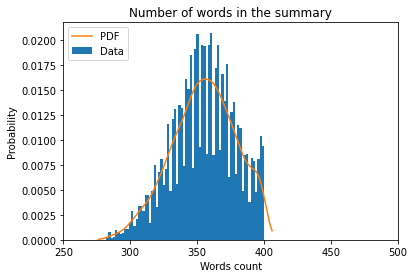

In [8]:
plt.hist(summary_lengths, density=True, bins=70, label="Data")
mn, mx = plt.xlim()
plt.xlim(250, 500)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(summary_lengths)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Words count")
plt.title("Number of words in the summary");


In [9]:
from transformers import AutoTokenizer

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


In [10]:
model_name = 'google/t5-v1_1-base'
tokenizer = AutoTokenizer.from_pretrained(model_name) # тут буде даунлоад десь на гіг якщо правильно пам'ятаю

In [11]:

tokenized_summary = [tokenizer(text) for text in summaries]

tokenized_summary_lengths = np.array([len(text.input_ids) for text in tokenized_summary])
tokenized_summary_lengths

tokenized_full_text = [tokenizer(text) for text in full_texts]
tokenized_full_text_lengths = np.array([len(text.input_ids) for text in tokenized_full_text])

tokenized_full_text_lengths

Token indices sequence length is longer than the specified maximum sequence length for this model (543 > 512). Running this sequence through the model will result in indexing errors


array([543, 663, 491, ..., 928, 344, 366])

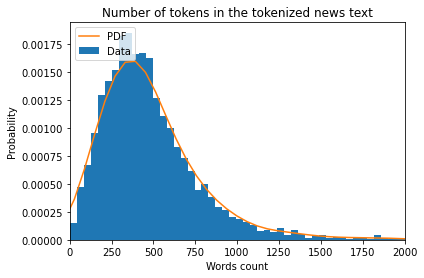

In [12]:

plt.hist(tokenized_full_text_lengths, density=True, bins=400, label="Data")
mn, mx = plt.xlim()
plt.xlim(0, 2000)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(tokenized_full_text_lengths)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Words count")
plt.title("Number of tokens in the tokenized news text");

In [13]:
np.percentile(tokenized_full_text_lengths, 94)

1011.5999999999999

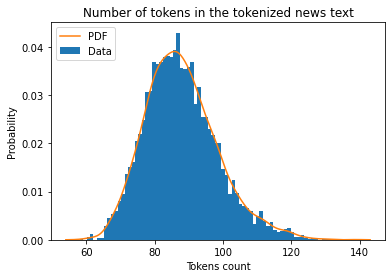

In [18]:

plt.hist(tokenized_summary_lengths, density=True, bins=80, label="Data")
mn, mx = plt.xlim()
# plt.xlim(0, 2000)
kde_xs = np.linspace(mn, mx, 300)
kde = st.gaussian_kde(tokenized_summary_lengths)
plt.plot(kde_xs, kde.pdf(kde_xs), label="PDF")
plt.legend(loc="upper left")
plt.ylabel("Probability")
plt.xlabel("Tokens count")
plt.title("Number of tokens in the tokenized news text");

In [19]:
np.percentile(tokenized_summary_lengths, 100)

139.0